In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import PIL
import imageio
import skimage

from IPython import display
# %matplotlib inline
%matplotlib notebook

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
tf.enable_eager_execution()

# Free Screw

In [3]:
encoder_path = '/home/justinvyu/shared/pretrained_models/free_screw_vae_32_dim/encoder_32_dim_0.5_beta_final.h5'
decoder_path = '/home/justinvyu/shared/pretrained_models/free_screw_vae_32_dim/decoder_32_dim_0.5_beta_final.h5'

In [ ]:
from softlearning.preprocessors.utils import get_vae_preprocessor

vae_preprocessor_params = {
    'type': 'VAEPreprocessor',
    'kwargs': {
        'encoder_path': encoder_path,
        'decoder_path': decoder_path,
        'trainable': False,
        'image_shape': (32, 32, 3),
        'latent_dim': 32,
        'include_decoder': True,
    }
}
vae = get_vae_preprocessor(**vae_preprocessor_)

# Fixed Screw

In [3]:
encoder_path = '/home/justinyu/shared/pretrained_models/fixed_screw_vae_16_dim/encoder_16_dim_5.0_beta_final.h5'
decoder_path = '/home/justinyu/shared/pretrained_models/fixed_screw_vae_16_dim/decoder_16_dim_5.0_beta_final.h5'

In [5]:
from softlearning.preprocessors.utils import get_vae_preprocessor

vae_preprocessor_params = {
    'type': 'VAEPreprocessor',
    'kwargs': {
        'encoder_path': encoder_path,
        'decoder_path': decoder_path,
        'trainable': False,
        'image_shape': (32, 32, 3),
        'latent_dim': 16,
        'include_decoder': True,
    }
}
vae = get_vae_preprocessor(**vae_preprocessor_params['kwargs'])

In [6]:
vae.encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
Total params: 73,600
Trainable params: 73,600
Non-trainable params: 0
_______________________________________________________

In [7]:
vae.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               8704      
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 32, 32, 32)        18464     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 32, 32, 3)         867       
Total params: 83,459
Trainable params: 83,459
Non-trainable params: 0
_______________________________________________________

In [9]:
data_dir = '/home/justinyu/shared/vice_goals/fixed_screw/goal_0_-90/positives.pkl'
import pickle
with open(data_dir, 'rb') as f:
    data = pickle.load(f)

In [10]:
data['pixels'].shape

(513, 32, 32, 3)

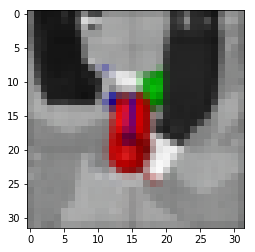

In [14]:
plt.imshow(data['pixels'][0])
img_data = data['pixels'][0]

In [16]:
recon = vae.reconstruct(img_data[None])

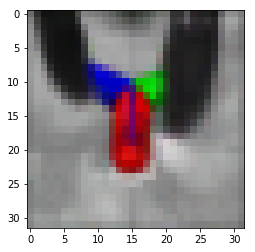

In [18]:
plt.imshow(recon[0])

In [36]:
rand_idxs = np.random.choice(data['pixels'].shape[0], size=64)

In [37]:
imgs = data['pixels'][rand_idxs]
import skimage
recons = skimage.util.img_as_ubyte(vae.reconstruct(imgs))

In [28]:
print(recons)

[[[[ 27  24  28]
   [ 14  13  16]
   [ 11  10  13]
   ...
   [149 151 147]
   [142 146 146]
   [127 125 128]]

  [[ 31  28  30]
   [ 16  14  15]
   [ 11  11  13]
   ...
   [165 167 165]
   [161 163 163]
   [136 137 139]]

  [[ 40  37  37]
   [ 18  14  17]
   [ 11  11  11]
   ...
   [157 158 159]
   [153 154 154]
   [123 124 125]]

  ...

  [[137 138 137]
   [146 148 146]
   [143 145 144]
   ...
   [144 144 142]
   [143 143 143]
   [131 130 130]]

  [[145 147 147]
   [164 165 164]
   [160 161 162]
   ...
   [142 142 141]
   [142 142 142]
   [126 125 124]]

  [[134 138 136]
   [156 155 156]
   [157 155 159]
   ...
   [126 127 129]
   [127 129 128]
   [114 115 114]]]


 [[[ 11  10  11]
   [ 11  10  11]
   [ 20  20  22]
   ...
   [ 71  76  74]
   [137 145 146]
   [130 127 127]]

  [[  9   9  10]
   [  9  10  12]
   [ 22  23  22]
   ...
   [ 55  56  53]
   [141 146 153]
   [133 137 137]]

  [[ 11  12  12]
   [ 13  13  15]
   [ 36  40  38]
   ...
   [ 41  41  44]
   [112 116 115]
   [125 126

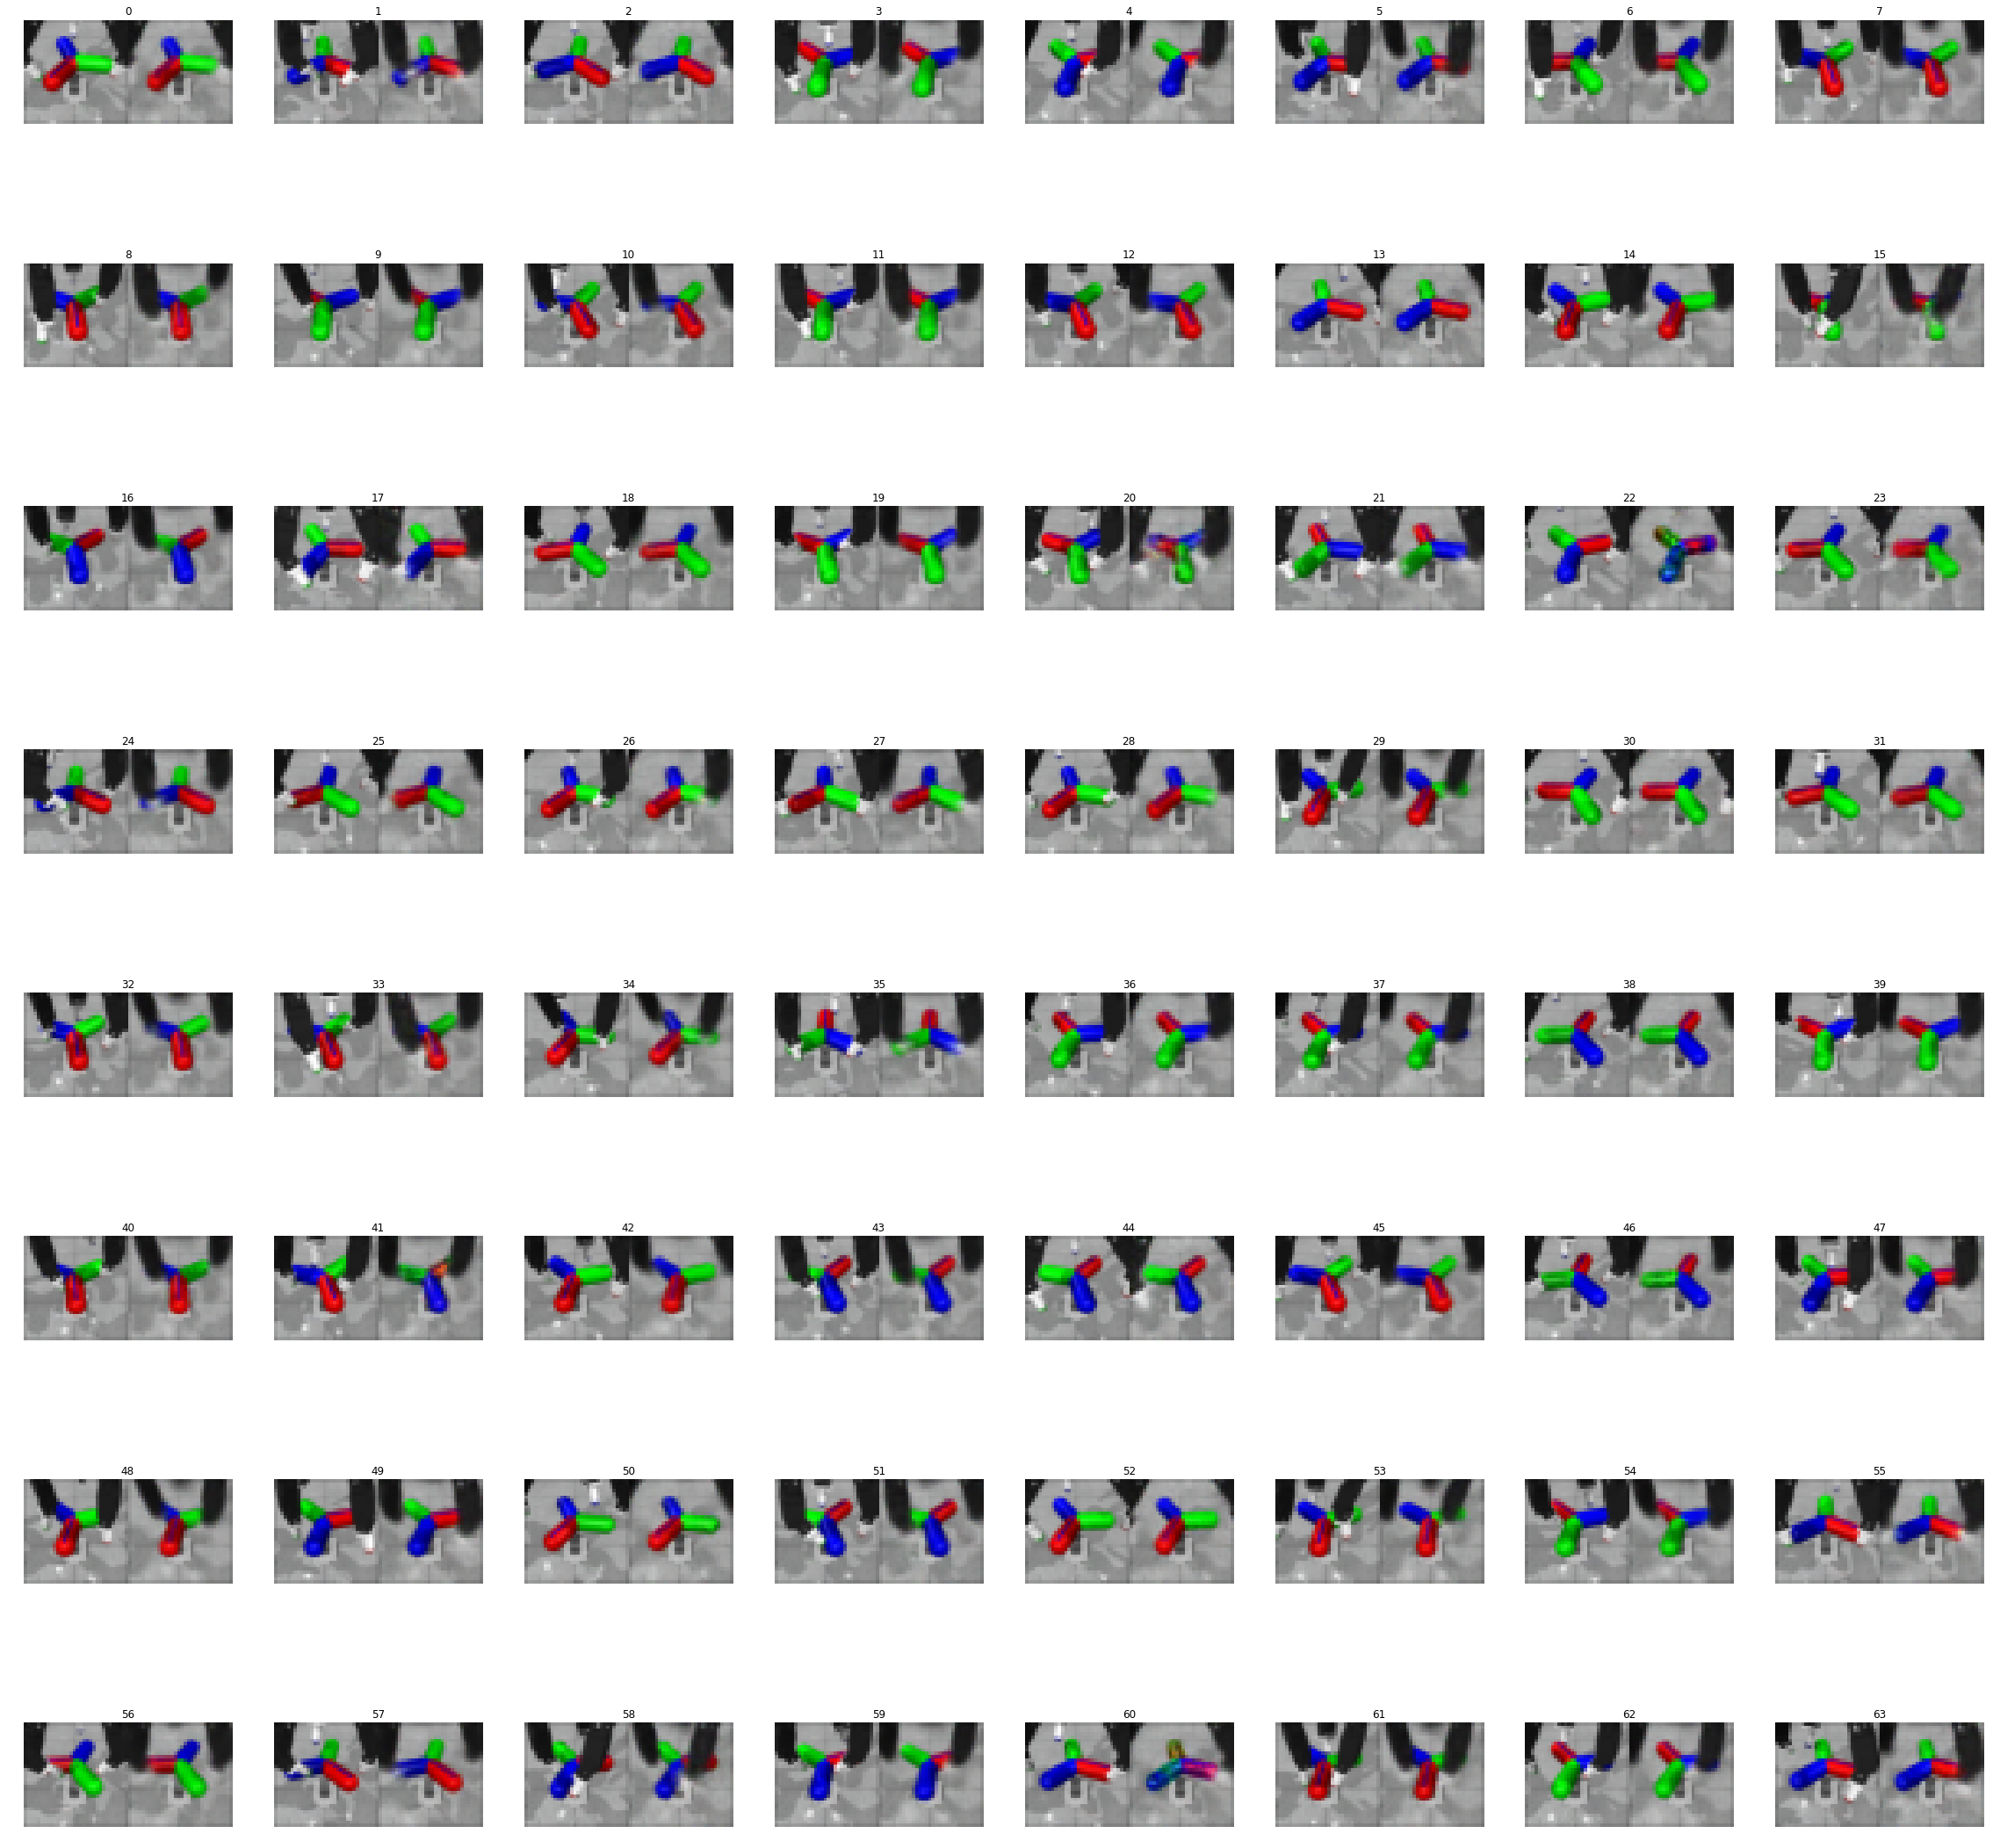

In [38]:
n_entries = len(rand_idxs)

import math
n_columns = np.sqrt(n_entries)
n_rows = math.ceil(n_entries / n_columns) + 1
plt.figure(figsize=(5 * n_columns, 5 * n_rows))
#     plt.title(title)
for i, (img, recon) in enumerate(zip(imgs, recons)):
    plt.subplot(n_rows, n_columns, i+1)
    plt.axis('off')
    plt.title(f'{i}')
    concat = np.concatenate([img, recon], axis=1)
    plt.imshow(concat)

In [32]:
import gzip
path = '/nfs/kun1/users/justinvyu/data/fixed_screw_vae_data.pkl'
with gzip.open(path, 'rb') as f:
    data = pickle.load(f)

In [33]:
data['pixels'].shape

(450000, 32, 32, 3)

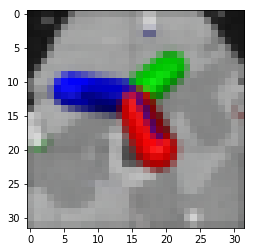

In [34]:
plt.imshow(data['pixels'][0])